## A Model predicting Song Lyrics 
Song - "All of me" by Johnny Legend

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [5]:
data = open('all_of_me.txt').read()
corpus = data.lower().split("\n")

Tokenizing the words in the data.

In [6]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


In [7]:
print(tokenizer.word_index)

{'all': 1, 'you': 2, 'my': 3, 'me': 4, 'of': 5, 'and': 6, 'give': 7, 'your': 8, 'i': 9, "i'm": 10, "you're": 11, 'to': 12, 'oh': 13, "'cause": 14, "i'll": 15, 'even': 16, 'when': 17, 'in': 18, 'out': 19, 'on': 20, 'mind': 21, 'but': 22, 'loves': 23, 'love': 24, 'curves': 25, 'edges': 26, 'perfect': 27, 'imperfections': 28, 'end': 29, 'beginning': 30, 'lose': 31, 'winning': 32, 'what': 33, 'do': 34, 'head': 35, "can't": 36, 'down': 37, 'beautiful': 38, "head's": 39, 'under': 40, 'water': 41, 'breathing': 42, 'fine': 43, 'crazy': 44, 'the': 45, "it's": 46, 'would': 47, 'without': 48, 'smart': 49, 'mouth': 50, 'drawing': 51, 'kicking': 52, "you've": 53, 'got': 54, 'spinning': 55, 'no': 56, 'kidding': 57, 'pin': 58, "what's": 59, 'going': 60, 'that': 61, 'magical': 62, 'mystery': 63, 'ride': 64, 'so': 65, 'dizzy': 66, "don't": 67, 'know': 68, 'hit': 69, 'be': 70, 'alright': 71, 'how': 72, 'many': 73, 'times': 74, 'have': 75, 'tell': 76, 'crying': 77, 'too': 78, 'world': 79, 'is': 80, 'beat

In [8]:
print(total_words)

106


In [9]:
print(corpus)

['what would i do without your smart mouth?', 'drawing me in, and you kicking me out', "you've got my head spinning, no kidding, i can't pin you down", "what's going on in that beautiful mind?", "i'm on your magical mystery ride", "and i'm so dizzy, don't know what hit me, but i'll be alright", "my head's under water", "but i'm breathing fine", "you're crazy and i'm out of my mind", "'cause all of me", 'loves all of you', 'love your curves and all your edges', 'all your perfect imperfections', 'give your all to me', "i'll give my all to you", "you're my end and my beginning", "even when i lose i'm winning", "'cause i give you all of me", 'and you give me all of you, oh-oh', 'how many times do i have to tell you?', "even when you're crying, you're beautiful too", "the world is beating you down, i'm around through every mood", "you're my downfall, you're my muse", 'my worst distraction, my rhythm and blues', "i can't stop singing, it's ringing, in my head for you", "my head's under water

Creating the padded sequence which will be fed to the network along the tokens ( numerical forms of the words in the dataset).

In [10]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
# the above makes the pyramid of list with length equal to the words in the line.

# the code below change the pyramid structure a squre by adding padding

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))



Splitting each sentence with the last word of every sentence as the label for that particular sentence. 

*The basic split for dealing with time series data*

In [11]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = to_categorical(labels, num_classes = total_words) 

In [12]:
print(len(xs))

291


In [13]:
print(len(ys))

291


In [14]:
print(tokenizer.word_index['mouth'])
print(tokenizer.word_index['kidding'])
print(tokenizer.word_index['imperfections'])
print(tokenizer.word_index['beginning'])
print(tokenizer.word_index['ringing'])
print(tokenizer.word_index['edges'])
print(tokenizer.word_index['showing'])
print(tokenizer.word_index['hearts'])

50
57
28
30
94
26
100
101


A sample of input_sentence where the last two are actual words and the remaining zeros refer to padding.

The corresponding label for 'xs[1]' is also shown i.e. 'ys[1]'

In [15]:
print(xs[1])

[ 0  0  0  0  0  0  0  0  0  0 33 47]


In [16]:
print(ys[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Creating the model.


In [17]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len - 1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.02)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12, 100)           10600     
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 106)               31906     
Total params: 343,706
Trainable params: 343,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(xs,ys,epochs=20,verbose=1)

Epoch 1/20
10/10 [==============================] - 0s 13ms/step - loss: 4.5705 - accuracy: 0.0584
Epoch 2/20
10/10 [==============================] - 0s 13ms/step - loss: 3.7260 - accuracy: 0.1168
Epoch 3/20
10/10 [==============================] - 0s 14ms/step - loss: 2.6767 - accuracy: 0.3299
Epoch 4/20
10/10 [==============================] - 0s 15ms/step - loss: 1.8133 - accuracy: 0.5120
Epoch 5/20
10/10 [==============================] - 0s 14ms/step - loss: 1.0809 - accuracy: 0.6942
Epoch 6/20
10/10 [==============================] - 0s 14ms/step - loss: 0.6985 - accuracy: 0.8076
Epoch 7/20
10/10 [==============================] - 0s 13ms/step - loss: 0.5385 - accuracy: 0.8316
Epoch 8/20
10/10 [==============================] - 0s 13ms/step - loss: 0.3150 - accuracy: 0.9038
Epoch 9/20
10/10 [==============================] - 0s 14ms/step - loss: 0.2018 - accuracy: 0.9381
Epoch 10/20
10/10 [==============================] - 0s 14ms/step - loss: 0.1283 - accuracy: 0.9622
Epoch 11/

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

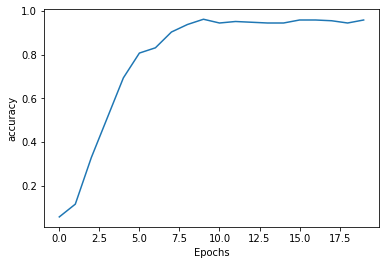

In [21]:
plot_graphs(model.history, 'accuracy')

In [22]:
seed_text = "How many times do I have to tell you?"
next_word = 50
for _ in range(next_word):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len -1,padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  outout_word=''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text +=" "+output_word
print(seed_text) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
How many times do I have to tell you? down i'm around through every mood mood down down i'm around through mood alright down down down i'm around through alright alright down i'm around through every mood alright alright down you but i'm mood alright mood alright alright hit me but i'll be alright alright out of i'm of


"How many times do I have to tell you? down i'm around through every mood mood down down i'm around through mood alright down down down i'm around through alright alright down i'm around through every mood alright alright down you but i'm mood alright mood alright alright hit me but i'll be alright alright out of i'm of"  -> prediction made by the model.

The lyrics aren't exactly the same or in other word the prediction made by the model isn't very accurate but they make some sense related to the actual song.